In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
import pybaseball
from matplotlib import patches

Test KDE simulation with Logan Webb's pitches

In [24]:
webb = pybaseball.statcast_pitcher('2023-03-31', '2023-10-03', 657277)

In [25]:
def add_sz_plate(ax):
    # add home plate to plot 
    home_plate_coords = [[-0.71, 0], [-0.85, -0.5], [0, -1], [0.85, -0.5], [0.71, 0]]
    ax.add_patch(patches.Polygon(home_plate_coords,
                                    edgecolor = 'darkgray',
                                    facecolor = 'lightgray',
                                    zorder = 2))

    # add strike zone to plot, technically the y coords can vary by batter
    ax.add_patch(patches.Rectangle((-0.71, 1.5), 2*0.71, 2,
                    edgecolor = 'lightgray',
                    fill=False,
                    lw=3,
                    zorder = 2))
    return ax

In [26]:
webb = webb.loc[:, ['pitcher', 'plate_x', 'plate_z', 'stand', 'p_throws', 'pitch_type', 'balls', 'strikes', 'ax', 'az']]
webb = webb.dropna()

In [27]:
webb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pitcher     2774 non-null   int64  
 1   plate_x     2774 non-null   float64
 2   plate_z     2774 non-null   float64
 3   stand       2774 non-null   object 
 4   p_throws    2774 non-null   object 
 5   pitch_type  2774 non-null   object 
 6   balls       2774 non-null   int64  
 7   strikes     2774 non-null   int64  
 8   ax          2774 non-null   float64
 9   az          2774 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 216.8+ KB


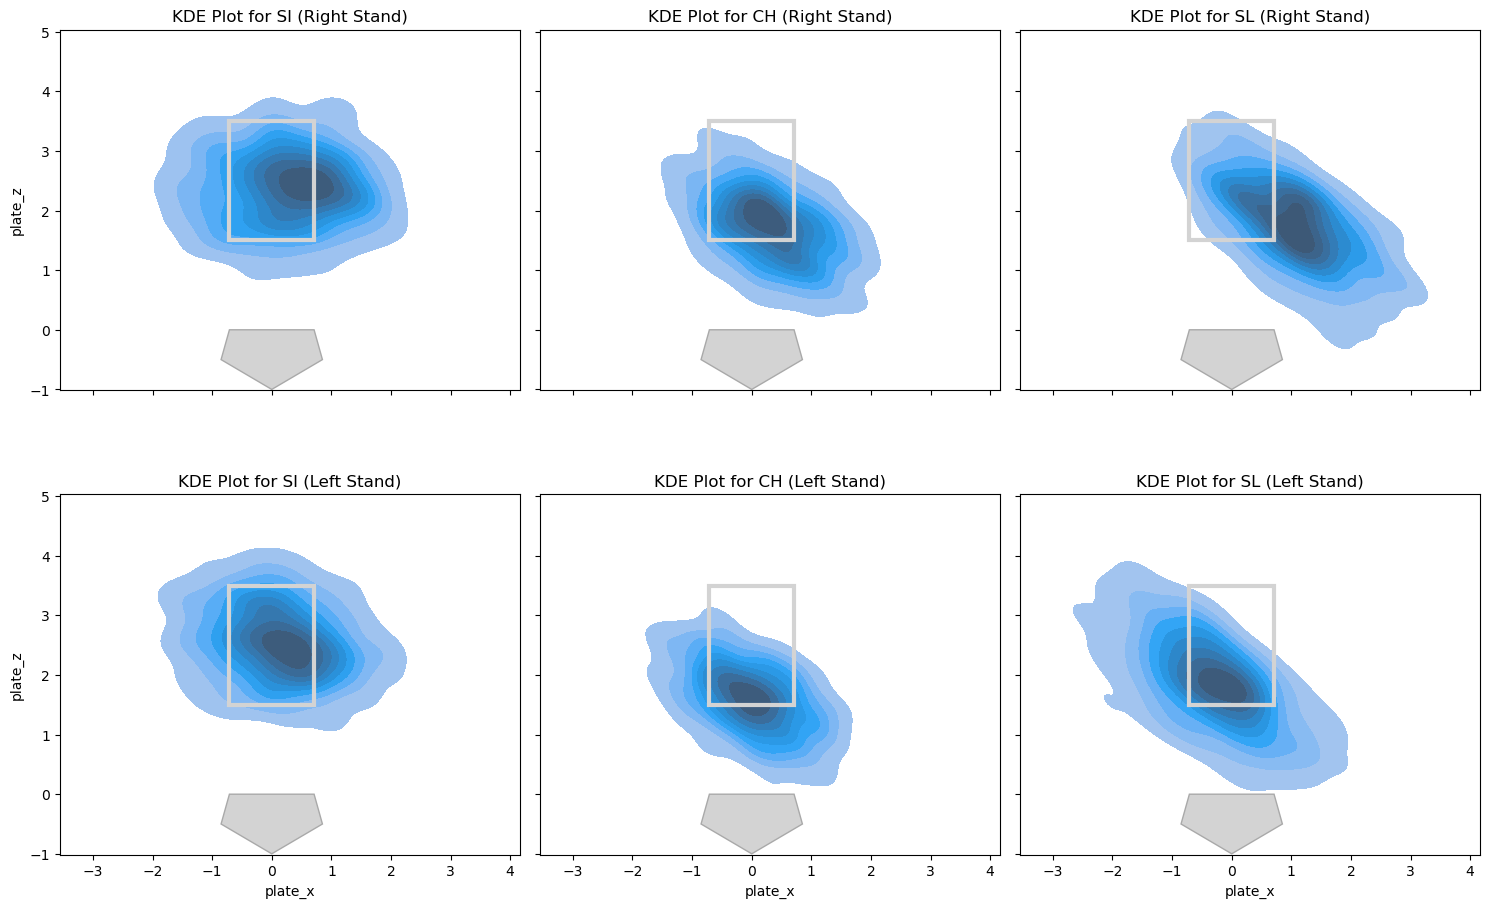

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

pitch_types = ['SI', 'CH', 'SL']

for i, pitch_type in enumerate(pitch_types):
    data_L = webb[(webb['pitch_type'] == pitch_type) & (webb['stand'] == 'L')]
    data_R = webb[(webb['pitch_type'] == pitch_type) & (webb['stand'] == 'R')]
    
    sns.kdeplot(data=data_R, x='plate_x', y='plate_z', fill=True, ax=axs[0, i])
    axs[0, i] = add_sz_plate(axs[0, i])  # add home plate and strike zone
    axs[0, i].set_title(f'KDE Plot for {pitch_type} (Right Stand)')
    axs[0, i].set_aspect('equal')  # make each plot a square
    
    sns.kdeplot(data=data_L, x='plate_x', y='plate_z', fill=True, ax=axs[1, i])
    axs[1, i] = add_sz_plate(axs[1, i])  # add home plate and strike zone
    axs[1, i].set_title(f'KDE Plot for {pitch_type} (Left Stand)')
    axs[1, i].set_aspect('equal')  # make each plot a square

plt.tight_layout()
plt.show()



In [32]:

ax.scatter(data_SI_R['plate_x'], data_SI_R['plate_z'], color='red', alpha=0.5)


